In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [14]:
img = cv2.imread('lenna.jpg')
cv2.imshow('lenna', img)
key = cv2.waitKey()
if key == 27: # ESC键
    cv2.destroyAllWindows()
print(img)
# 数字范围：[0, 255]，0代表黑，255代表白 - Intensity
# uint: unsigned integer
# int8: int类型只占了8位

[[[126 136 223]
  [127 137 224]
  [128 138 226]
  ...
  [119 146 233]
  [ 99 132 218]
  [ 70 105 191]]

 [[127 137 224]
  [127 137 224]
  [127 137 225]
  ...
  [123 147 235]
  [106 134 221]
  [ 77 107 194]]

 [[125 137 225]
  [125 137 225]
  [125 137 225]
  ...
  [126 144 233]
  [113 131 220]
  [ 84 104 192]]

 ...

 [[ 56  22  83]
  [ 53  19  80]
  [ 64  30  94]
  ...
  [ 81  70 174]
  [ 77  66 176]
  [ 75  66 176]]

 [[ 55  21  82]
  [ 53  19  80]
  [ 68  34  98]
  ...
  [ 83  71 177]
  [ 81  72 183]
  [ 79  72 183]]

 [[ 56  22  83]
  [ 54  20  81]
  [ 68  34  98]
  ...
  [ 79  69 176]
  [ 83  74 185]
  [ 82  74 188]]]


In [10]:
img_gray.shape  # 第一个代表高度，第二个代表宽度

(512, 512, 3)

#### image crop

In [13]:
img_crop = img_gray[0:100, 0:200]
cv2.imshow('lenna', img_crop)
key = cv2.waitKey()
if key == 27: # ESC键
    cv2.destroyAllWindows()

#### 通道

In [15]:
# 显示每个单独的通道
B, G, R = cv2.split(img_gray)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

#### Basic Operation
- Change color
- Gamma Correction
- histogram：对图像像素进行统计
- 图像的旋转
- scale：图像变大变小
- translation：平移
- Affine（仿射） Transform：90度不再是90度，但平行线还是平行的
- perspertive（投影） transform：平行线可不平行，90度不再是90度，直线仍然是直线。
- 其目的主要是为了Data Augmentation

In [20]:
# change color
def random_light_color(img):
    B, G, R = cv2.split(img)
    
    b_rand = random.randint(-50, 50)
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand
        B[B > lim] = 255
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype)
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B < lim] = 0
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)
        
    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (b_rand + G[G >= lim]).astype(img.dtype)
        
    r_rand = random.randint(-50, 50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)
        
    img_merge = cv2.merge((B, G, R))
    return img_merge

img_random_color = random_light_color(img)
cv2.imshow('img_random_color', img_random_color)
cv2.imshow('img_original', img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [21]:
# gamma correction
def adjust_gamma(img, gamma=1.0):
    invGamma = 1.0 / gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype('uint8')
    return cv2.LUT(img, table)

img_brighter = adjust_gamma(img, 2)
cv2.imshow('img_brighter', img_brighter)
cv2.imshow('img_original', img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

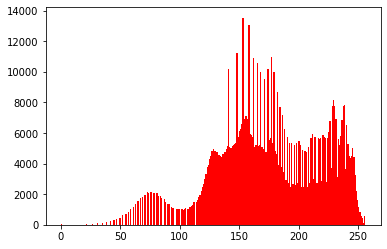

In [26]:
# histogram
img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 255, [0, 256], color='r')
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) # 直方图均衡
# y: Luminance(明亮度)，u&v：色度&饱和度
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2.imshow("Color input image", img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [28]:
# rotation
M = cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[1]/2), 30, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0])) # 将产生的M作用到img图像上

cv2.imshow('rotated lenne', img_rotate)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [29]:
# scale + rotation + translation = similarity transform 直角不变，平行线不变
M = cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[1]/2), 30, 0.5)
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

cv2.imshow('rotated lenne', img_rotate)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [34]:
# affine transform
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('affine lenne', dst)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [40]:
# perspective transform
def random_warp(img, row, col):
    height, width, channel = img.shape
    
    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)
    
    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)
    
    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp

M_warp, img_wrap = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('lenne_warp', img_wrap)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [33]:
cv2.warpAffine?